Um dieses Dokument als Präsentation anzusehen, in Kommandozeile folgendes ausführen: `jupyter nbconvert SYE-economicviability.ipynb --to slides --post serve --SlidesExporter.reveal_scroll=True` (\cite{speck_presenting_2017} siehe https://medium.com/@mjspeck/presenting-code-using-jupyter-notebook-slides-a8a3c3b59d67) und \cite{mayeesha_present_2018}.

<div>
<img src="https://www.th-koeln.de/img/logo.svg" width="100">
</div>

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons Lizenzvertrag" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
<br />Dieses Werk ist lizenziert unter einer <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Namensnennung - Weitergabe unter gleichen Bedingungen 4.0 International Lizenz</a>.

Prof. Dr. Johanna Friederike May <br>
Technische Hochschule Köln <br>
Fakultät für Informations-, Medien- und Elektrotechnik (F07)<br>
Institut für Elektrische Energietechnik (IET)<br>
Cologne Institute for Renewable Energy (CIRE)<br>

# Systemtechnik für Energieeffizienz - Wirtschaftlichkeit

<div class="admonition note" style="background: #e5f1ff; padding: 10px">
<div class="title"><b>Lerziele für diese Einheit:</b></div>
    <ul>
        <li> Energiesummen oder Leistungsflüsse in Sankey-Diagrammen anzeigen </li>
        <li> Annuitätenmethode anwenden </li>
        <li> Amortisationsrechnung vergleichen </li>
    </ul>
</div>

Bibliotheken für python:

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from matplotlib.sankey import Sankey
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import pandas as pd

Grafikparameter für die Diagramme festlegen:

In [2]:
linw = 2 # Linienbreite
lincol = 'orange' # Linienfarbe
lincol2 = 'red'
rcParams['font.family'] = 'sans-serif' # serifenfreie Schrift in Abbildungen
rcParams['font.size'] = 16 # Schriftgröße

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Suchen Sie sich ein Gerät, eine Investition, die für Ihr Projekt relevant sein könnte heraus und rechnen Sie hier bereits mit Beispielwerten mit.
</div>

*Antwort: Das Beispielgerät, die Beispielinvestition ist ...*

- [ ] TODO evtl. integrieren [Wirtschaftlichkeitsrechner der Energieeffizienzagentur](https://www.energieagentur.nrw/energieeffizienz/unternehmen/wirtschaftlichkeitsrechner)

## Sankey-Diagramme darstellen

orientiert am Tutorial https://python-graph-gallery.com/220-sankey-diagram-with-matplotlib/ \cite{holtz_220_2017}

### grundlegendes Sankey-Diagramm

Text(0.5, 1.0, 'Mein erstes Sankey Diagramm')

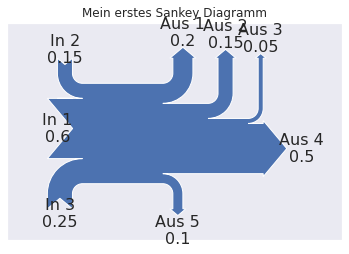

In [3]:
Sankey(flows=[0.25,0.15,0.60,-0.20,-0.15,-0.05,-0.50,-0.10], #
       labels=['In 3','In 2','In 1','Aus 1','Aus 2','Aus 3','Aus 4','Aus 5'], #
       orientations=[-1,1,0,1,1,1,0,-1]).finish()
plt.title("Mein erstes Sankey Diagramm")

### Flüsse definieren und nutzen

Beispiel: Wasserkocher mit geschätzten Werten

#### Eingangsflüsse

In [4]:
wasserenergie=20
elektrischeenergie=80
inlabels=['Wasserwärme','Elektrische Energie']

#### Ausgangsflüsse

In [5]:
wasserhitze=40
verdampft=20
abwaerme=37
elektrischverluste=3
outlabels=['Wasserwärme','Verdampft','Abwärme','Elektrische Verluste']

#### Energieflüsse zusammensetzen: Zuflüsse positiv, Abflüsse negativ

In [6]:
energiefluesse=[wasserenergie,elektrischeenergie,-wasserhitze,-verdampft,-abwaerme,-elektrischverluste]
energielabels=inlabels+outlabels
print(energielabels)

['Wasserwärme', 'Elektrische Energie', 'Wasserwärme', 'Verdampft', 'Abwärme', 'Elektrische Verluste']


Text(0.5, 1.0, 'Geschätzte Energieflüsse eines Wasserkochers')

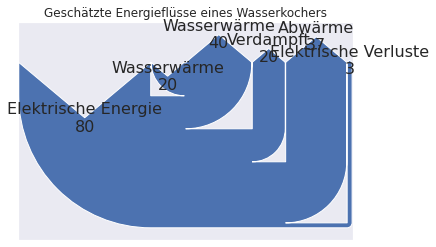

In [7]:
Sankey(flows=energiefluesse, #
       labels=energielabels, #
       orientations=[1,1,1,1,1,1]
      ).finish()
plt.title("Geschätzte Energieflüsse eines Wasserkochers")

hübsch ist es noch nicht, aber man sieht schon, dass die Energieerhaltung eingehalten wird, denn es geht 100% Energie hinein und 100% heraus und dies ist in der Breite der Pfeile wiedergespiegelt

#### Layout verschönern

alle Optionen finden sich in der Hilfe https://matplotlib.org/api/sankey_api.html

z. B. wäre es ganz nett, eine Einheit zu benennen

In [8]:
energieeinheit='%'

Text(0.5, 1.0, 'Geschätzte Energieflüsse eines Wasserkochers')

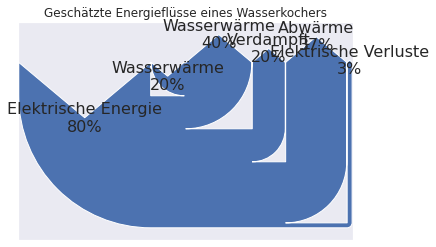

In [9]:
Sankey(flows=energiefluesse, #
       labels=energielabels, #
       orientations=[1,1,1,1,1,1], #
       unit=energieeinheit
      ).finish()
plt.title("Geschätzte Energieflüsse eines Wasserkochers")

einige Pfade nach unten abgehen lassen

Text(0.5, 1.0, 'Geschätzte Energieflüsse eines Wasserkochers')

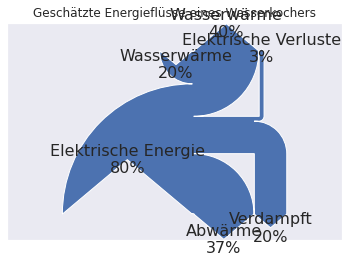

In [10]:
Sankey(flows=energiefluesse, #
       labels=energielabels, #
       orientations=[1,-1,1,-1,-1,1], #
       unit=energieeinheit, #
      ).finish()
plt.title("Geschätzte Energieflüsse eines Wasserkochers")

Text mit etwas mehr Abstand setzen

In [11]:
offsetvomtext=50

Text(0.5, 1.0, 'Geschätzte Energieflüsse eines Wasserkochers')

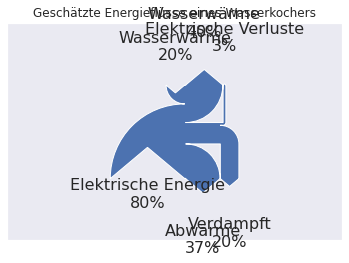

In [12]:
Sankey(flows=energiefluesse, #
       labels=energielabels, #
       orientations=[1,-1,1,-1,-1,1], #
       unit=energieeinheit, #
       offset=offsetvomtext
      ).finish()
plt.title("Geschätzte Energieflüsse eines Wasserkochers")

Farbe ändern

In [13]:
sankeyfarbe='red'

Text(0.5, 1.0, 'Geschätzte Energieflüsse eines Wasserkochers')

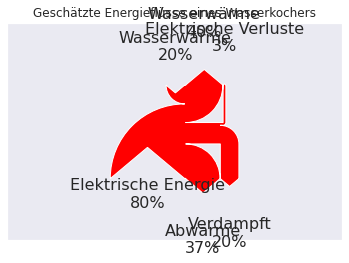

In [14]:
Sankey(flows=energiefluesse, #
       labels=energielabels, #
       orientations=[1,-1,1,-1,-1,1], #
       unit=energieeinheit, #
       offset=offsetvomtext, #
       facecolor=sankeyfarbe
      ).finish()
plt.title("Geschätzte Energieflüsse eines Wasserkochers")

Flüsse teilweise horizontal anordnen mit orientation 0

Text(0.5, 1.0, 'Geschätzte Energieflüsse eines Wasserkochers')

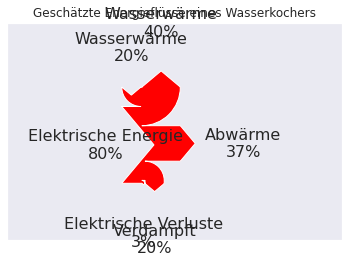

In [15]:
Sankey(flows=energiefluesse, #
       labels=energielabels, #
       orientations=[1,0,1,-1,0,-1], #
       unit=energieeinheit, #
       offset=offsetvomtext, #
       facecolor=sankeyfarbe
      ).finish()
plt.title("Geschätzte Energieflüsse eines Wasserkochers")

Längeres Diagramm

In [16]:
stammlaenge=150

Text(0.5, 1.0, 'Geschätzte Energieflüsse eines Wasserkochers')

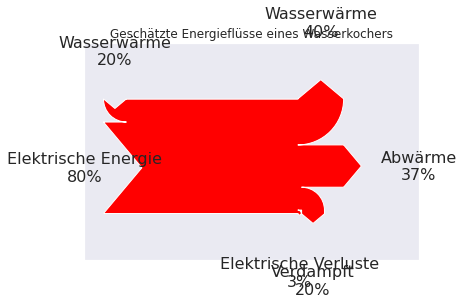

In [17]:
Sankey(flows=energiefluesse, #
       labels=energielabels, #
       orientations=[1,0,1,-1,0,-1], #
       unit=energieeinheit, #
       offset=offsetvomtext, #
       facecolor=sankeyfarbe, #
       trunklength=stammlaenge
      ).finish()
plt.title("Geschätzte Energieflüsse eines Wasserkochers")

Pfadlängen anpassen

In [18]:
pfadlaengen=[30,50,3,10,10,30]

Text(0.5, 1.0, 'Geschätzte Energieflüsse eines Wasserkochers')

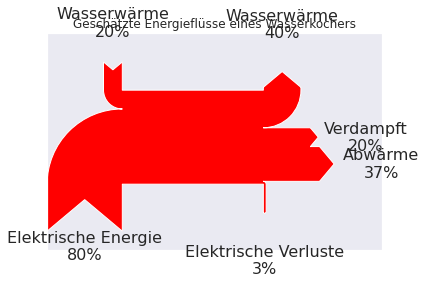

In [19]:
Sankey(flows=energiefluesse, #
       labels=energielabels, #
       orientations=[1,-1,1,0,0,-1], #
       unit=energieeinheit, #
       offset=offsetvomtext, #
       facecolor=sankeyfarbe, #
       trunklength=stammlaenge, #
       pathlengths=pfadlaengen
      ).finish()
plt.title("Geschätzte Energieflüsse eines Wasserkochers")

Größe des Diagramms festlegen und Titel nach oben schieben

Text(0.5, 1.18, 'Geschätzte Energieflüsse eines Wasserkochers')

<Figure size 576x360 with 0 Axes>

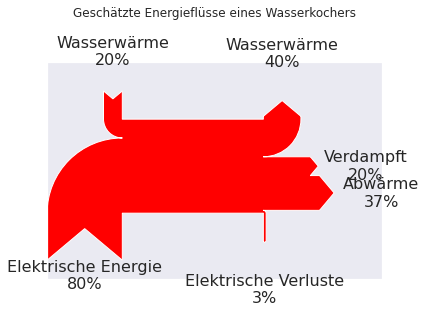

In [20]:
plt.figure(figsize=(8,5))
Sankey(flows=energiefluesse, #
       labels=energielabels, #
       orientations=[1,-1,1,0,0,-1], #
       unit=energieeinheit, #
       offset=offsetvomtext, #
       facecolor=sankeyfarbe, #
       trunklength=stammlaenge, #
       pathlengths=pfadlaengen
      ).finish()
plt.title("Geschätzte Energieflüsse eines Wasserkochers",y=1.18)

Schraffur nutzen (siehe Tipp von https://stackoverflow.com/questions/33484883/changing-alignment-of-labels-in-matplotlib-sankey-diagrams)

Text(0.5, 1.18, 'Geschätzte Energieflüsse eines Wasserkochers')

<Figure size 576x360 with 0 Axes>

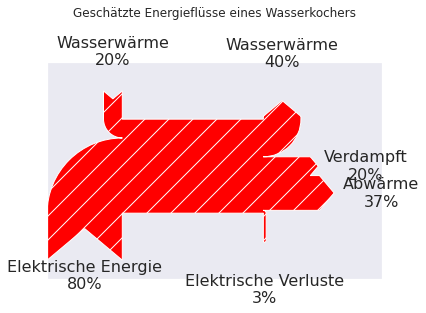

In [21]:
plt.figure(figsize=(8,5))
s=Sankey(flows=energiefluesse, #
       labels=energielabels, #
       orientations=[1,-1,1,0,0,-1], #
       unit=energieeinheit, #
       offset=offsetvomtext, #
       facecolor=sankeyfarbe, #
       trunklength=stammlaenge, #
       pathlengths=pfadlaengen
      )
d=s.finish()
d[-1].patch.set_hatch('/')
plt.title("Geschätzte Energieflüsse eines Wasserkochers",y=1.18)

## Wirtschaftlichkeit im Bereich Energieeffizienz bewerten (nach \cite{schellong_analyse_2016})

- Investitionsentscheidungen unterstützen
- Optimierungsmaßnahmen vergleichen
- häufig verwendet: Annuitätenmethode nach VDI-Richtlinie 2067
- typische Fragen: 
 - ab wann lohnt sich die Investition, z. B. dieses Jahr schon?
 - wie lange dauert es, bis die Investition sich rentiert?
 - wie viel Geld muss heute auf dem Konto sein, um in 5 Jahren die Stromrechnung bezahlen zu können?
 - bei welchem Zinssatz, bei welcher Inflation lohnt sich heute eine bestimmte Investition?

### Annuitätenmethode

- **Zins** $p$: Preis für geliehenes Kapital, Angabe in Prozent oder als Zinssatz $i$, **Zinsfaktor $q=1+i$**
- **Kapitalwert**: betriebswirtschaftliche Größe, die durch Abzinsung Zahlungen zu unterschiedlichen Zeitpunkten vergleichbar macht, d.h. Summe der Barwerte der Zahlungen
- **Barwert**: Wert von zukünftigen Zahlungen in der Gegenwart
- **Beispiel**: Zinsfuß in Spanien 2017 $p = 1,4\%$, Zinssatz $i = 0,014$, Zinsfaktor $q = 1,014$

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wir stimmen im Kurs einen Zinssatz ab, mit dem alle rechnen. Notieren Sie diesen hier. Bestimmen Sie damit den Kapitalwert für Ihre Investition, wenn Sie zwei Jahre zurückliegt. Bestimmen Sie außerdem den Barwert für die Investition, wenn Sie sie heute tätigen und wenn Sie sich in drei Jahren tätigen.
</div>

Zinssatz 2020/2021: 2%

*Antwort:...*

### Kostenarten

- **Kapitalgebundene Kosten**: z. B. Investitionen in technische Anlagen (z. B. Generator, Motor, bauliche Anlagen)
- **Bedarfsgebundene Kosten**: z. B. Kosten für Brenn- und Hilfsstoffe sowie für Hilfsenergie
- **Betriebsgebundene Kosten**: im Wesentlichen Wartung und Instandhaltung
- **Sonstige Kosten**: Planungen, Versicherungen, allgemeine Abgaben, noch nicht erfasste Steuern, anteilige Verwaltungskosten

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche Kostenarten fallen bei Ihrer Investition an. Dokumentieren Sie diese hier.
</div>

*Antwort:...*

### Annuitätenfaktor

Basiert auf geometrischer Reihe: 
$a_{k+1} = a_k \cdot q$ für $k = 0,1, ..., n$

Partialsumme der ersten $n$ Glieder einer geometrischen Reihe:
\begin{equation}
s_n = a_0 + a_1 + a_2 + ... + a_n = \sum_{k=0}^n a_k = a_0 \cdot \sum_{k=0}^n q^k = a_0 \cdot \frac{q^{n+1} - 1}{q-1}
\end{equation}

**Annuitätsfaktor**: Rechenwert zur Berechnung jährlicher Zins- und Tilgungszahlungen eines Darlehens, abhängig von Zinshöhe und Laufzeit bzw. vertraglich vereinbartem Tilgungsanteil
\begin{equation}
a = \frac{q^T \cdot (q-1)}{q^T - 1}
\end{equation}

mit dem Betrachtungszeitraum $T$ (i.d.R. in Jahren)

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wir stimmen im Kurs einen gemeinsamen Betrachtungszeitraum 𝑇 ab. Dokumentieren Sie diesen hier und berechnen Sie den zugehörigen Annuitätenfaktor.
</div>

Betrachtungszeitraum $T$ 2020/2021: 10 Jahre

*Antwort:...*

### Barwert und Annuität

**Barwertfaktor**:
\begin{equation}
b = \frac{1}{a} = \frac{q^T - 1}{q^T \cdot (q-1)}
\end{equation}

**Barwert**: 
\begin{equation}
\text{BW} = k\cdot\frac{q^n - 1}{q^n \cdot (q-1)} 
\end{equation}

Das ist die Summe aller Barwerte einer Zahlungsreihe mit $n$ gleichbleibenden am Ende eines Jahres fälligen Zahlungen $k$, umgewandelt in eine Einmalzahlung zum Bezugszeitpunkt zu Beginn des ersten Jahres.

**Annuität**: 
\begin{equation}
A_n = K_0 \cdot \frac{q^T \cdot (q-1)}{q^T - 1}
\end{equation}

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Bestimmen Sie Barwertfaktor, Barwert nach einer unterschiedlichen Anzahl von Jahren (als Zeitreihe) und Annuitäten (als Zeitreihe).
</div>

*Antwort:...*

In [22]:
# Beispiel
Investition = 1000 # Euro
Jahre = np.array([1,2,3,4,5,6,7,8,9,10])
Zinsen = np.array([0.02,0.04,0.06,0.08,0.1])
AnnuiFaktoren = pd.DataFrame(columns = 100*Zinsen)
AnnuiFaktoren[100*Zinsen[0]] = ((1+Zinsen[0])**Jahre*Zinsen[0])/((1+Zinsen[0])**Jahre -1)
AnnuiFaktoren[100*Zinsen[1]] = ((1+Zinsen[1])**Jahre*Zinsen[1])/((1+Zinsen[1])**Jahre -1)
AnnuiFaktoren[100*Zinsen[2]] = ((1+Zinsen[2])**Jahre*Zinsen[2])/((1+Zinsen[2])**Jahre -1)
AnnuiFaktoren[100*Zinsen[3]] = ((1+Zinsen[3])**Jahre*Zinsen[3])/((1+Zinsen[3])**Jahre -1)
AnnuiFaktoren[100*Zinsen[4]] = ((1+Zinsen[4])**Jahre*Zinsen[4])/((1+Zinsen[4])**Jahre -1)
print('Investition ' + str(Investition) + ' Euro, Zinssatz ' + str(100*Zinsen[1]) +'% über ' +str(Jahre[4]) +' Jahre: pro Jahr ' +str(100*np.round(AnnuiFaktoren.iloc[4,1],3)) +'% der Investition zurückzahlen, insgesamt ' + str(Jahre[4]) + 'x' +str(100*np.round(AnnuiFaktoren.iloc[4,1],3))+'% = ' +str(100*Jahre[4]*np.round(AnnuiFaktoren.iloc[4,1],3)) +'%, also ' +str(Investition*Jahre[4]*np.round(AnnuiFaktoren.iloc[4,1],5))+' Euro')
print('Investition ' + str(Investition) + ' Euro, Zinssatz ' + str(100*Zinsen[1]) +'% über ' +str(Jahre[9]) +' Jahre: pro Jahr ' +str(100*np.round(AnnuiFaktoren.iloc[9,1],3)) +'% der Investition zurückzahlen, insgesamt ' + str(Jahre[9]) + 'x' +str(100*np.round(AnnuiFaktoren.iloc[9,1],3))+'% = ' +str(100*Jahre[9]*np.round(AnnuiFaktoren.iloc[9,1],3)) +'%, also ' +str(Investition*Jahre[9]*np.round(AnnuiFaktoren.iloc[9,1],4))+' Euro')


Investition 1000 Euro, Zinssatz 4.0% über 5 Jahre: pro Jahr 22.5% der Investition zurückzahlen, insgesamt 5x22.5% = 112.5%, also 1123.15 Euro
Investition 1000 Euro, Zinssatz 4.0% über 10 Jahre: pro Jahr 12.3% der Investition zurückzahlen, insgesamt 10x12.3% = 123.0%, also 1233.0 Euro


### Annuität kapitalgebundener Kosten $A_{\text{N,K}}$ 

Kapitalgebundene Kosten einer Investition auf regelmäßige jährliche Kosten (= Annuitäten) verteilen

Betrachtungszeitraum $T$: 
- Lebensdauer der Komponenten innerhalb von $T$
- Lebensdauer der Komponenten außerhalb von $T$ $\to$ **Restwert**

\begin{equation}
A_{\text{N,K}} = (A_0 + A_1 + A_2 + ... + A_n - R_W)\cdot a 
\end{equation}

Mit dem Investitionsbetrag $A_0$, dem Barwert der $i$-ten Ersatzbeschaffung $A_i$ (mit $i=1..n$) und dem Restwert $R_W$

Barwert der Ersatzbeschaffungen aus
\begin{equation}
A_i = A_0 \cdot \frac{r^{i\cdot T_N}}{q^{i\cdot T_N}}
\end{equation}

mit der Anzahl der Nutzungsjahre $T_N$ der ersetzten Komponente und dem Preisänderungsfaktor $r$

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wie lange halten welche Ihrer Komponenten? Recherchieren Sie plausible Werte. Ermitteln Sie daraus, ob Sie einen Restwert oder Ersatzbeschaffungen berücksichtigen müssen. Schätzen Sie einen Preisänderungsfaktor ab. Berechnen Sie daraus nun die Annuität kapitalgebundener Kosten und den Barwert der Ersatzbeschaffungen.
</div>

*Antwort:...*

### Restwert $R_W$

Lineare Abschreibung des Investitionsbetrags bis zum Ende des Betrachtungszeitraums und Abzinsung auf den Beginn des Betrachtungszeitraums

Für $T>T_N$: Ersatzinvestition linear abschreiben statt Anfangsinvestition
\begin{equation}
R_W = A_0 \cdot \text{Beschaffungspreis}\cdot\text{Lineare Abschreibung}\cdot\text{Abzinsung}   
\end{equation}

mit 
\begin{equation}
\text{Beschaffungspreis} = r^{n\cdot T_N} 
\end{equation}
\begin{equation}
\text{Lineare Abschreibung} = \frac{(n+1)\cdot T_N - T}{T_N} 
\end{equation}
\begin{equation}
\text{Abzinsung}= \frac{1}{q^T}
\end{equation}

Anzahl der Ersatzbeschaffungen $n$ innerhalb des Betrachtungszeitraums

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Ermitteln Sie den Restwert als Zeitreihe.
</div>

*Antwort:...*

### Preisdynamischer Barwertfaktor $b$

bei Preisänderungen während des Betrachtungszeitraums, z. B. Verringerung des Preises von Batterien oder Solarmodulen
\begin{equation}
b = \frac{1-\left(\frac{r}{q}\right)^T}{q-r}\text{ für }r\neq q\text{ bzw. }b=\frac{T}{q}\text{ für }r=q   
\end{equation}

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Ermitteln Sie den preisdynamischen Barwertfaktor als Zeitreihe.
</div>

*Antwort:...*

In [23]:
# Beispiel für ANK für den Wechselrichter einer Photovoltaikanlage
A0 = 1000 # Euro Anschaffungspreis
Zeitraum = 20 # Jahre (EEG-Einspeisevergütung)
r = 0.99 # Preisänderungsfaktor
q = 1.05 # Zinsfaktor
TN = 7 # Jahre Nutzungsdauer (dann kaputt) -> Ersatz nach 7 und 14 Jahren
n = Zeitraum // TN # Anzahl Ersatzbeschaffungen im Zeitraum
A=np.zeros(n)
for k in range(n):
    A[k]=A0*r**((k+1)*TN)/(q**((k+1)*TN)) # Barwerte für Ersatzbeschaffungen
print('Barwerte für Ersatzbeschaffungen: ')
print('A1 = ' + str(int(np.round(A[0],0))) + ' Euro, A2 = ' +str(int(np.round(A[1],0))) +' Euro')
RW = A0*r**(n*TN)*((n+1)*TN-Zeitraum)/(TN*q**Zeitraum) # Restwert
print('Restwert: ' +str(int(np.round(RW,0))) + ' Euro')
a = q**Zeitraum*(q-1)/(q**Zeitraum -1) # Annuitätsfaktor
print('Annuitätsfaktor: ' +str(np.round(100*a,2)) +'%')
ANK = (A0+np.sum(A)-RW)*a # Annuität für den Wechselrichter
print('Annuität für den Wechselrichter: ' +str(int(np.round(ANK,0))) +' Euro')

Barwerte für Ersatzbeschaffungen: 
A1 = 662 Euro, A2 = 439 Euro
Restwert: 47 Euro
Annuitätsfaktor: 8.02%
Annuität für den Wechselrichter: 165 Euro


### Annuität bedarfsgebundener Kosten $A_{\text{N,V}}$ 

für Brennstoff, Hilfsstoffe, etc. z. B. auch für Stromkosten
\begin{equation}
A_{\text{N,V}} = A_{\text{V1}}\cdot a\cdot b_V  
\end{equation}

mit den bedarfs- bzw. verbrauchsgebundenen Kosten im ersten Jahr $A_{\text{V1}}$ und dem preisdynamischen Barwertfaktor $b_V$ 

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Wir legen im Kurs gemeinsam einen Strompreis fest. Notieren Sie diesen hier.
</div>

Strompreis 2020/2021 30 €ct/kWh

*Antwort:...*

### Annuität betriebsgebundener Kosten $A_{\text{N,B}}$ 

für Kosten, die sich z. B. mit dem Lohnniveau ändern
\begin{equation}
A_{\text{N,B}} = A_{\text{B1}}\cdot a \cdot b_{\text{B}} + A_{\text{IN}}\cdot a \cdot b_{\text{IN}}\text{ mit } A_{\text{IN}} = A_0 \cdot (f_{\text{Inst}}+f_{\text{W+Insp.}})          
\end{equation}

Dabei sind:
- $A_{\text{B1}}$ betriebsgebundene Kosten im ersten Jahr für Bedienung der Anlage
- $b_{\text{B}}$ preisdynamischer Barwertfaktor für betriebsgebundene Kosten
- $A_{\text{IN}}$ betriebsgebundene Kosten im ersten Jahr für Instandhaltung
- $b_{\text{IN}}$ preisdynamischer Barwertfaktor für Instandhaltung
- $f_{\text{W+Insp.}}$ Faktor für den Aufwand bei der Wartung und Inspektion
- $f_{\text{Inst}}$ Faktor für Aufwand bei der Instandsetzung 

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche Kosten fallen hier in Ihrem Projekt an? Notieren Sie (falls keine anfallen: begründen Sie).
</div>

*Antwort:...*

### Sonstige Kosten $A_{\text{N,S}}$ 

\begin{equation}
A_{\text{N,S}} = A_{\text{S1}}\cdot a \cdot b_{\text{S}}   
\end{equation}

Dabei sind:
- $A_{\text{S1}}$ sonstige Kosten im ersten Jahr
- $b_{\text{S}}$ preisdynamischer Barwertfaktor für sonstige Kosten  

<div class="admonition important" style="background: #e9f6ec; padding: 10px">
<div class="title"><b>AUFGABE</b></div>
Welche Kosten fallen hier in Ihrem Projekt an? Notieren Sie (falls keine anfallen: begründen Sie).
</div>

*Antwort:...*

### Erlöse $A_{\text{N,E}}$ 

Projekt- und betreiberabhängig:
- kapitalgebundene Erlöse (z. B. Zuschüsse)
- bedarfsgebundene Erlöse
- betriebsgebundene Erlöse (z. B. Einspeisevergütung)

Berücksichtigung wie Zahlungsarten, nur mit anderem Vorzeichen

### Beispiel: Wirtschaftlichkeit einer Investition in eine Photovoltaikanlage mit vereinfachten Annahmen

In [24]:
PN = 30 # kWp Nennleistung
Investprokwp = 800 # Euro pro kWp
p = 0.05 # Zinssatz
Einspeise = 0.05 # Euro pro kWh
Dauer = 25 # Jahre
Wartung = 100 # Euro pro Jahr
TN = 7 # Wechselrichter Tausch alle soundsoviel Jahre
WRprokwp = 200 # Beschaffungspreis Wechselrichter
EinstrahlungDE = 1000 # kWh/kWp
EinstrahlungIT = 2000 # kWh/kWp
a = (1+p)**Dauer*(1+p-1)/((1+p)**Dauer-1) # Annuitätsfaktor
print('Annuitätsfaktor ' + str(np.round(100*a,2)) +'%')
n = Dauer//TN
A = np.zeros(n)
for k in range(n):
    A[k] = WRprokwp*PN*(1+p)**((k+1)*TN)/((1+p)**(k+1)*TN)
ANK = (Investprokwp*PN + sum(A))*a
print('Kapitalgebundene Annuität ' + str(int(np.round(ANK,0)))+' Euro')
ANB = Wartung
print('Betriebsgebundene Annuität ' + str(int(np.round(ANB,0)))+' Euro')
ANEDE = PN*EinstrahlungDE*Einspeise
ANEIT = PN*EinstrahlungIT*Einspeise
print('Annuität der Erlöse bei ' +str(int(np.round(EinstrahlungDE))) +' kWh/kWp: ' + str(int(np.round(ANEDE,0)))+' Euro')
print('Annuität der Erlöse bei ' +str(int(np.round(EinstrahlungIT))) +' kWh/kWp: ' + str(int(np.round(ANEIT,0)))+' Euro')
print('Gesamtannuität bei ' +str(int(np.round(EinstrahlungDE))) +' kWh/kWp: ' +str(int(np.round(ANEDE-ANK-ANB,0)))+' Euro')
print('Gesamtannuität bei ' +str(int(np.round(EinstrahlungIT))) +' kWh/kWp: ' +str(int(np.round(ANEIT-ANK-ANB,0)))+' Euro')

if (ANEDE-ANK-ANB)<0: print('bei ' +str(int(np.round(EinstrahlungDE))) + ' kWh/kWp lohnt sich Investition nicht') 
else: print('bei ' +str(int(np.round(EinstrahlungDE))) + ' kWh/kWp lohnt sich Investition')

if (ANEIT-ANK-ANB)<0: print('bei ' +str(int(np.round(EinstrahlungIT))) + ' kWh/kWp lohnt sich Investition nicht') 
else: print('bei ' +str(int(np.round(EinstrahlungIT))) + ' kWh/kWp lohnt sich Investition')


Annuitätsfaktor 7.1%
Kapitalgebundene Annuität 2040 Euro
Betriebsgebundene Annuität 100 Euro
Annuität der Erlöse bei 1000 kWh/kWp: 1500 Euro
Annuität der Erlöse bei 2000 kWh/kWp: 3000 Euro
Gesamtannuität bei 1000 kWh/kWp: -640 Euro
Gesamtannuität bei 2000 kWh/kWp: 860 Euro
bei 1000 kWh/kWp lohnt sich Investition nicht
bei 2000 kWh/kWp lohnt sich Investition


### Berücksichtigung der Inflation

In Zeiten stabiler Preise, d.h. Inflation Null: Nominalzins $p$ und Realzins $p_r$ gleich \cite{wehrheim_investitionsrechnung_2007}

Zunahme des Preisniveaus mit Inflationsrate $i$ $\to$ Zunahme des Nominalzinssatzes

Inflationsrate höher als Nominalzins $(i>p)$ $\to$ negativer Realzins, d.h. Gläubiger verliert Kapital

Aufzinsungsfaktor $q=(1+p) = (1+p_r)(1+i)=1+p_r+i+ip_r$

da zumeist $ip_r << p_r, i$: $q\approx 1 + p_r + i$

für Inflationsbereinigung notwendig

manche Länder haben hohe Inflation - wirkt wie hoher Zins!

## Amortisationsrechnung

Anzahl der Jahre berechnen, bis eingesetztes Kapital durch Kosteneinsparungen wieder erwirtschaftet

"payback time"

üblicherweise statische Anwendung, ohne Diskontierung

\begin{equation}
t_{\text{payback}}=\frac{\text{Kapitaleinsatz}}{\text{Nettoeinsparung}}   
\end{equation}

Vorsicht: Effekt von Zinsen und Inflation häufig nicht vernachlässigbar! Es ergeben sich unterschiedliche Werte bei Annuitätenrechnung und Amortisationsrechnung! **Nicht in Projekten von SYE ausreichend!**

# References

<mark> <b>The bib file SYE.bib was not found

</b> </mark>(<a id="cit-speck_presenting_2017" href="#call-speck_presenting_2017">?</a>) !! _This reference was not found in SYE.bib _ !!

(<a id="cit-mayeesha_present_2018" href="#call-mayeesha_present_2018">?</a>) !! _This reference was not found in SYE.bib _ !!

(<a id="cit-holtz_220_2017" href="#call-holtz_220_2017">?</a>) !! _This reference was not found in SYE.bib _ !!

(<a id="cit-schellong_analyse_2016" href="#call-schellong_analyse_2016">?</a>) !! _This reference was not found in SYE.bib _ !!

(<a id="cit-wehrheim_investitionsrechnung_2007" href="#call-wehrheim_investitionsrechnung_2007">?</a>) !! _This reference was not found in SYE.bib _ !!

